In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import pandas as pd
from scipy.optimize import fsolve
from copy import deepcopy as copy
from disp import get_ordered_colors
from functools import partial

plt.rc('font', family='serif')
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2.0

In [47]:
def comp_r_out(t, w, b, a, u):
    onset_about_mean = np.inf
    if a > 1e-6 and w > 1e-6 and b > 1e-6:
        onset_about_mean = np.sqrt(np.log(w * a / b))
    print(onset_about_mean)
    t_star = np.exp(u - onset_about_mean)
    t_star_star = np.exp(u + onset_about_mean)
    
#     print(t_star, t_star_star)
#     print(-np.square(np.log(t) - u))
#     print(t)
    r_out = np.where(np.bitwise_and(t >= t_star, t < t_star_star), w * a * np.exp(-np.square(np.log(t) - u)) - b, 0)
    return r_out

inf
1.1774100225154747
1.048147073968205
0.9903682411162659
0.9572307620809911


Text(0, 0.5, 'Firing rate (Hz)')

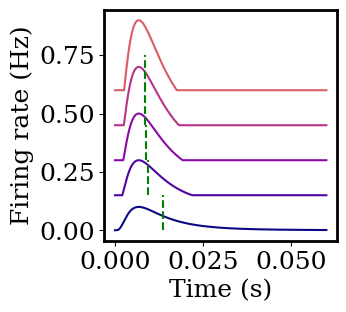

In [51]:
w_set = 0.009
b_set = 0.01

w = np.linspace(1, 5, 5)
b = np.linspace(0, 0.2, 5)

a_plot, T_plot = np.meshgrid(np.linspace(0.1, 0.1, 5), np.linspace(-5, -5, 5))

scale = 1
fig, axs = plt.subplots(1, 1, figsize=(3 * scale, 3 * scale))

n_lines = 8
cmap = mpl.colormaps['plasma']

# Take colors at regular intervals spanning the colormap.
colors = cmap(np.linspace(0, 1, n_lines))

dt = 0.00005
t = np.linspace(0, 0.06, int(0.06 / dt))

all_r_outs_adjusted = []

for i in range(w.shape[0]):
    r_out = comp_r_out(t, w[i], b[i], a_plot.flatten()[i], T_plot.flatten()[i])
    t_mean = np.sum(t * r_out) / np.sum(r_out)
#     r_out_adjust = np.concatenate([np.zeros(int((T_max_half - half_T) / dt)), r_out])
#     r_out_adjust = r_out_adjust[:int(0.06/dt)]
    all_r_outs_adjusted.append(r_out)
    axs.plot(np.arange(len(r_out)) * dt, r_out + 0.15 * i, c=colors[i])
    axs.plot(t_mean * np.ones(2), 0.15 * i + np.array([0, 0.15]), '--', color='green')
    
axs.set_xlabel('Time (s)')
axs.set_ylabel('Firing rate (Hz)')